# Lab 5: Naive Bayes classification analysis on Default of Credit Card Clients Dataset

## Introduction:


### Naive Bayes algorithm can be defined as a supervised classification algorithm which is based on Bayes theorem with an assumption of independence among features.

## Data Description:

In [ ]:
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (0=male, 1=female)
#EDUCATION: (0=graduate , 1=under graduate)
#MARRIAGE: Marital status (0=married, 1=single)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005
#PAY_2: Repayment status in August, 2005
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)

# Objective:

## The objective is to determine predict default of credit card clients using naive Bayes algorithm.

# Importing the libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categoricalfeatures from strings to number arrays
import plotly.express as px # for data visualization
import plotly.graph_objects as go # for data visualization
# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

# Importing data set

In [ ]:
data = pd.read_excel("C:/Users/HP/Downloads/credit.xls")
data

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_1,BILL_AMT1,BILL_AMT2,default_payment_next_month
0,160000,0,0,50,0,1,3,3,0
1,150000,0,0,27,1,1,222,3,0
2,60000,0,0,27,1,1,1130,7,0
3,220000,1,0,27,0,0,34686,8,0
4,400000,0,1,41,0,1,104083,8,0
...,...,...,...,...,...,...,...,...,...
26012,610000,0,0,38,0,0,608594,624475,0
26013,590000,1,1,63,0,0,630458,646770,0
26014,520000,0,1,54,0,0,653062,671563,0
26015,440000,0,0,39,0,0,431557,743970,0


# Explorative Data Analysis

In [ ]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_1                         0
BILL_AMT1                     0
BILL_AMT2                     0
default_payment_next_month    0
dtype: int64

In [ ]:
data.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_1,BILL_AMT1,BILL_AMT2,default_payment_next_month
count,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000,26017.000000
mean,162003.293231,0.406273,0.451013,35.362993,0.375908,0.402006,58302.720106,56461.442711,0.221163
std,130141.991475,0.491146,0.497604,9.239431,0.524889,0.490313,76105.840198,73601.747275,0.415038
min,10000.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,50000.000000,0.000000,0.000000,28.000000,0.000000,0.000000,8283.000000,8300.000000,0.000000
50%,130000.000000,0.000000,0.000000,34.000000,0.000000,0.000000,29770.000000,29095.000000,0.000000
75%,230000.000000,1.000000,1.000000,41.000000,1.000000,1.000000,77356.000000,74621.000000,0.000000
max,1000000.000000,1.000000,1.000000,79.000000,8.000000,1.000000,964511.000000,983931.000000,1.000000


In [ ]:
data['default_payment_next_month'].unique()

array([0, 1], dtype=int64)

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_1,BILL_AMT1,BILL_AMT2,default_payment_next_month
LIMIT_BAL,1.000000,-0.023724,0.097880,0.133568,-0.013126,0.094190,0.347005,0.340481,-0.181849
SEX,-0.023724,1.000000,-0.032589,0.098698,0.006807,-0.014877,0.021858,0.019357,0.040222
MARRIAGE,0.097880,-0.032589,1.000000,0.443143,0.037247,0.054803,0.033394,0.031658,0.031058
AGE,0.133568,0.098698,0.443143,1.000000,0.023531,0.055486,0.071122,0.070207,0.003802
PAY_0,-0.013126,0.006807,0.037247,0.023531,1.000000,0.643776,-0.211363,-0.198315,0.248613
PAY_1,0.094190,-0.014877,0.054803,0.055486,0.643776,1.000000,-0.328373,-0.322360,0.172236
BILL_AMT1,0.347005,0.021858,0.033394,0.071122,-0.211363,-0.328373,1.000000,0.958080,-0.020379
BILL_AMT2,0.340481,0.019357,0.031658,0.070207,-0.198315,-0.322360,0.958080,1.000000,-0.014788
default_payment_next_month,-0.181849,0.040222,0.031058,0.003802,0.248613,0.172236,-0.020379,-0.014788,1.000000


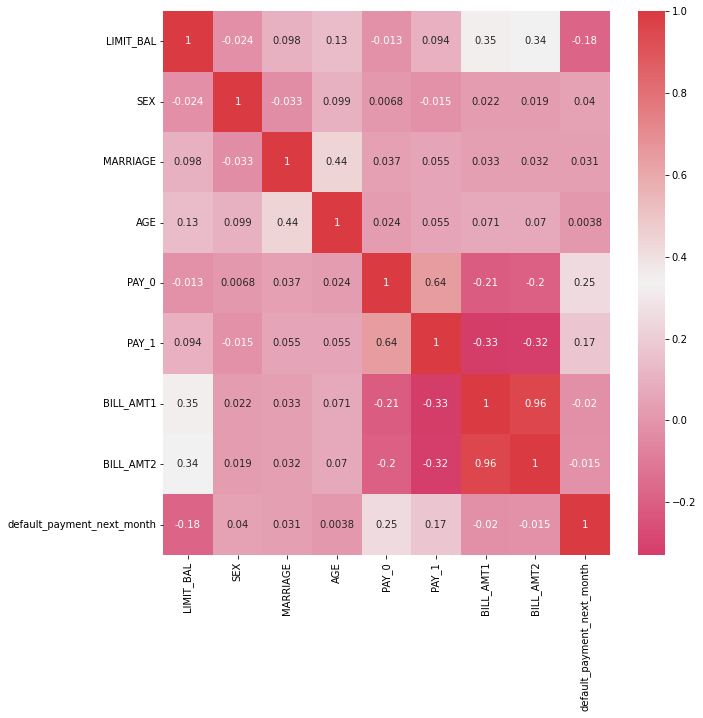

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(000,11,as_cmap=True),annot=True)
data.corr()

In [ ]:
#Interpretation:
#We can see that there is very correlation between the variables.

Text(0, 0.5, 'default payment next month')

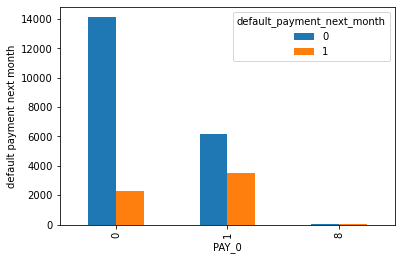

In [ ]:
pd.crosstab(data.PAY_0,data.default_payment_next_month).plot(kind='bar')
plt.xlabel('PAY_0')
plt.ylabel('default payment next month')

In [ ]:
#Interpretation:
#The blue line represents default payment 0(No) next month and orange line represents default payment next month 1(yes)

In [ ]:
#Declaring x and y variable.
y= data['default_payment_next_month'].copy()
X= data.drop('default_payment_next_month',axis=1)

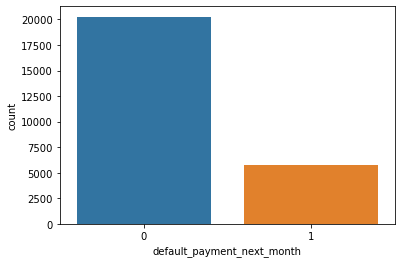

In [ ]:
import seaborn as sb
sb.countplot(x='default_payment_next_month',data=data)
plt.show()

In [ ]:
#Interpretation:
#Here we can see that there is imbalance in our observation .
#In oversampling we can go for particular technique like SMOTE(synthetic minority sampling technique)

# Analysis:

In [ ]:
#Splitting the dataset into the Training set and Test set (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
count_sub1 = len(data[data['default_payment_next_month']==0])
count_sub2 = len(data[data['default_payment_next_month']==1])

pct_of_sub1 = count_sub1/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub1*100)

pct_of_sub2 = count_sub2/(count_sub1+count_sub2)
print("percentage of subscription", pct_of_sub2*100)

percentage of subscription 77.8836914325249
percentage of subscription 22.116308567475112


### Synthentic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['default_payment_next_month'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))

print("Number of subscription",len(os_data_y[os_data_y['default_payment_next_month']==0]))
print("Number of subscription",len(os_data_y[os_data_y['default_payment_next_month']==1]))

print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['default_payment_next_month']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['default_payment_next_month']==1])/len(os_data_X))


length of oversampled data is  28406
Number of subscription 14203
Number of subscription 14203
Proportion of subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Approach 1 - Discretisation approach
- All continuous variables are converted into categorical through binning
- Multinomial NBC is applied for all

In [ ]:
# Bin continuous vairbales into 20% quantiles
data['LIMIT_BAL_qt'] = pd.qcut(data['LIMIT_BAL'], 5, labels=['bottom 10', 'lower 10', 'middle 10', 'upper 10', 'top 10'])
data['AGE_qt'] = pd.qcut(data['AGE'], 5,labels=['bottom 10', 'lower 10', 'middle 10', 'upper 10', 'top 10'])
data['BILL_AMT1_qt'] = pd.qcut(data['BILL_AMT1'], 5,labels=['bottom 10', 'lower 10', 'middle 10', 'upper 10', 'top 10'])
data['BILL_AMT2_qt'] = pd.qcut(data['BILL_AMT2'], 5,labels=['bottom 10', 'lower 10', 'middle 10', 'upper 10', 'top 10'])


In [ ]:
#We are Binning continuous variables into 20% quantiles and storing it in new variables in the same dataframe

In [ ]:
X=data[['LIMIT_BAL_qt','SEX','MARRIAGE','AGE_qt','PAY_0','PAY_1','BILL_AMT1_qt','BILL_AMT2_qt']]
y=data['default_payment_next_month'].values

In [ ]:
# Function that handles sample splitting, model fitting and report printing
def mfunc(X, y, typ):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)
    # Predict class labels on a test data
    pred_labels = model.predict(X_test)
    # Print model attributes
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else:
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels




In [ ]:
#coding categorical variables
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [ ]:
#Fitting and summary for test data
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y,CategoricalNB())

Classes:  [0 1]
Class Log Priors:  [-0.24736181 -1.51803589]
--------------------------------------------------------
Accuracy Score:  0.7580707148347425
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4011
           1       0.45      0.24      0.32      1193

    accuracy                           0.76      5204
   macro avg       0.63      0.58      0.58      5204
weighted avg       0.72      0.76      0.73      5204




The accuracy measure obtained 0.76 which implies the model is a good model

Out of all the positive predictions:-

 80% can be accurately predicted that the default credit card prediction is No
 45% can be accurately predicted that the  default credit card prediction is Yes.

Out of all the actual positives:-

91% of the predictions are accurate that the default credit card prediction is No.
24% of the predictions are accurate that the default credit card prediction is Yes.

The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting.
It allows a model to be evaluated taking both the precision and recall into account using a single score Helpful when describing the performance of the model and in comparing models.
A smaller beta value, gives more weight to precision and less to recall. Here Macro average is the AM of scores of two classes and the weighted average is the proportion of observations in each class.
Since it is balnced classification the macro average and weighted average are same.

### Approach 2 - Hybrid approach
- Train two models seperately
- Predict class probabilities and combine two to train the final model

In [ ]:
# Select data for modeling
X_C=data[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2']] # continuous
X_D=data[['SEX','MARRIAGE','PAY_0','PAY_1']] # discrete
y=data['default_payment_next_month'].values
print(X_C)
print(X_D)

       LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2
0         160000   50          3          3
1         150000   27        222          3
2          60000   27       1130          7
3         220000   27      34686          8
4         400000   41     104083          8
...          ...  ...        ...        ...
26012     610000   38     608594     624475
26013     590000   63     630458     646770
26014     520000   54     653062     671563
26015     440000   39     431557     743970
26016    1000000   47     964511     983931

[26017 rows x 4 columns]
       SEX  MARRIAGE  PAY_0  PAY_1
0        0         0      0      1
1        0         0      1      1
2        0         0      1      1
3        1         0      0      0
4        0         1      0      1
...    ...       ...    ...    ...
26012    0         0      0      0
26013    1         1      0      0
26014    0         1      0      0
26015    0         0      0      0
26016    0         1      0      0

[26017 rows x 4 columns]


In [ ]:
# Encode categorical variables
enc = OrdinalEncoder()
X_D = enc.fit_transform(X_D)
X_D[:,0]
X_D[:,0].ravel()
X_D

array([[0., 0., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
X=np.c_[X_C, X_D[:,0], X_D[:,1]]
X

array([[1.60000e+05, 5.00000e+01, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00],
       [1.50000e+05, 2.70000e+01, 2.22000e+02, 3.00000e+00, 0.00000e+00,
        0.00000e+00],
       [6.00000e+04, 2.70000e+01, 1.13000e+03, 7.00000e+00, 0.00000e+00,
        0.00000e+00],
       ...,
       [5.20000e+05, 5.40000e+01, 6.53062e+05, 6.71563e+05, 0.00000e+00,
        1.00000e+00],
       [4.40000e+05, 3.90000e+01, 4.31557e+05, 7.43970e+05, 0.00000e+00,
        0.00000e+00],
       [1.00000e+06, 4.70000e+01, 9.64511e+05, 9.83931e+05, 0.00000e+00,
        1.00000e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
X

array([[1.60000e+05, 5.00000e+01, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00],
       [1.50000e+05, 2.70000e+01, 2.22000e+02, 3.00000e+00, 0.00000e+00,
        0.00000e+00],
       [6.00000e+04, 2.70000e+01, 1.13000e+03, 7.00000e+00, 0.00000e+00,
        0.00000e+00],
       ...,
       [5.20000e+05, 5.40000e+01, 6.53062e+05, 6.71563e+05, 0.00000e+00,
        1.00000e+00],
       [4.40000e+05, 3.90000e+01, 4.31557e+05, 7.43970e+05, 0.00000e+00,
        0.00000e+00],
       [1.00000e+06, 4.70000e+01, 9.64511e+05, 9.83931e+05, 0.00000e+00,
        1.00000e+00]])

In [ ]:
# ----- Fit the two models -----
# Now use the Gaussian model for continuous independent variable and
model_C= GaussianNB()
clf_C= model_C.fit(X_train[:,0:3], y_train)
# Categorical model for discrete independent variable
model_D = CategoricalNB()
clf_D= model_D.fit(X_train[:,3:7], y_train)

In [ ]:
C_train_probas = model_C.predict_proba(X_train[:,0:3])
D_train_probas = model_D.predict_proba(X_train[:,3:7])
C_test_probas = model_C.predict_proba(X_test[:,0:3])
D_test_probas = model_D.predict_proba(X_test[:,3:7])
C_train_probas

array([[0.68617739, 0.31382261],
       [0.71065816, 0.28934184],
       [0.76158019, 0.23841981],
       ...,
       [0.98355354, 0.01644646],
       [0.80246819, 0.19753181],
       [0.82780844, 0.17219156]])

We get the probability predictions from each model for the train data and test data seperately

In [ ]:
X_new_train = np.c_[(C_train_probas[:,1], D_train_probas[:,1])] # Train
X_new_test = np.c_[(C_test_probas[:,1], D_test_probas[:,1])] # Test
C_train_probas[:1]
X_new_train

array([[0.31382261, 0.33246938],
       [0.28934184, 0.22517046],
       [0.23841981, 0.12686878],
       ...,
       [0.01644646, 0.1032905 ],
       [0.19753181, 0.147327  ],
       [0.17219156, 0.19937827]])

We combine the probability prediction for class 1 from both models into a 2Dimensional array for the train data and test data

In [ ]:
D_train_probas

array([[0.66753062, 0.33246938],
       [0.77482954, 0.22517046],
       [0.87313122, 0.12686878],
       ...,
       [0.8967095 , 0.1032905 ],
       [0.852673  , 0.147327  ],
       [0.80062173, 0.19937827]])

In [ ]:

model = GaussianNB()
clf = model.fit(X_new_train, y_train)
# Fitting the Gaussian model on  X_new which is the combination the probability prediction for class 1 from both models

In [ ]:
# Predict class labels on a test data
pred_labels = model.predict(X_new_test)
pred_labels

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
# Predict class labels on a test data
pred_labels = model.predict(X_new_test)
pred_labels

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# Accuracy Measure

In [ ]:
print('Classes: ', clf.classes_) # class labels known to the classifier
print('Class Priors: ',clf.class_prior_) # probability of each class.
print('--------------------------------------------------------')
score = model.score(X_new_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
print(classification_report(y_test, pred_labels))

Classes:  [0 1]
Class Priors:  [0.77874405 0.22125595]
--------------------------------------------------------
Accuracy Score:  0.4980784012298232
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.47      0.60      4055
           1       0.24      0.58      0.34      1149

    accuracy                           0.50      5204
   macro avg       0.52      0.53      0.47      5204
weighted avg       0.68      0.50      0.54      5204



The accuracy measure obtained 0.53 which implies the model is a good model.

Out of all the positive predictions:-

Only 80% can be accurately predicted that the default credit card prediction is No
Only 24% can be accurately predicted that the default credit card prediction is Yes
Out of all the actual positives:-

47% of the predictions are accurate that the default credit card prediction is No
58% of the predictions are accurate that the default credit card prediction is Yes
The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting. It allows a model to be evaluated taking both the precision and recall into account using a single score Helpful when describing the performance of the model and in comparing models. A smaller beta value, gives more weight to precision and less to recall. Here Macro average is the AM of scores of two classes and the weighted average is the proportion of observations in each class. Since it is balnced classification the macro average and weighted average are same.

## Conclusion

For the given dataset naive bayes classification is implemented. Since the data set has both continous and categorical variables we use the two methods available under naive bayes classification problem which are hybrid approach and discretion approach. We obtain the accuracy measure and classification report using both the approaches. The discretion approach is better than the hybrid approach for the given data set as the accuracy score is higher for discretion approach compared to hybrid approach.